In [2]:
from skimage.io import imread,imshow
from skimage.color import rgb2gray,gray2rgb
from scipy import signal as sig
import numpy as np
import cv2

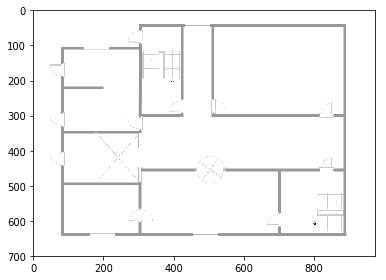

In [15]:
img = imread('map.png',as_gray = False)
imshow(img)

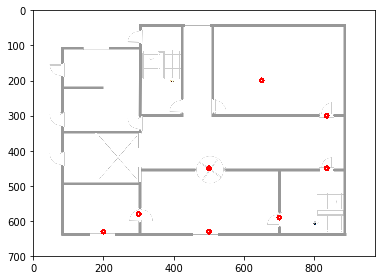

In [45]:
layer = img.copy()
coord = [
    (200,630),
    (300,580),
    (500,450),
    (700,590),
    (500,630),
    (835,450),
    (835,300),
    (650,200)
]
color = (255,0,0)
for x,y in coords:
    cv2.circle(layer,(x,y), 5, color, thickness=5) 
imshow(layer)

In [46]:
from collections import deque, namedtuple


# we'll use infinity as a default distance to nodes.
inf = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')


def make_edge(start, end, cost=1):
  return Edge(start, end, cost)


class Graph:
    def __init__(self, edges):
        # let's check that the data is right
        wrong_edges = [i for i in edges if len(i) not in [2, 3]]
        if wrong_edges:
            raise ValueError('Wrong edges data: {}'.format(wrong_edges))

        self.edges = [make_edge(*edge) for edge in edges]

    @property
    def vertices(self):
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2, both_ends=True):
        if both_ends:
            node_pairs = [[n1, n2], [n2, n1]]
        else:
            node_pairs = [[n1, n2]]
        return node_pairs

    def remove_edge(self, n1, n2, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        edges = self.edges[:]
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        for edge in self.edges:
            if [edge.start, edge.end] in node_pairs:
                return ValueError('Edge {} {} already exists'.format(n1, n2))

        self.edges.append(Edge(start=n1, end=n2, cost=cost))
        if both_ends:
            self.edges.append(Edge(start=n2, end=n1, cost=cost))

    @property
    def neighbours(self):
        neighbours = {vertex: set() for vertex in self.vertices}
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'
        distances = {vertex: inf for vertex in self.vertices}
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            if distances[current_vertex] == inf:
                break
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path


In [49]:
graph = Graph([
    (coord[0], coord[1], 3),  (coord[1], coord[2], 4),
    (coord[2], coord[3], 1),(coord[3], coord[4], 6),
    (coord[4], coord[5], 7),(coord[5], coord[6], 3)])

out = graph.dijkstra(coord[0], coord[4])

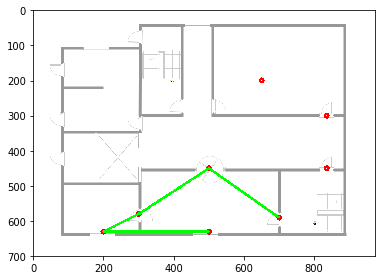

In [58]:
for i in range(0, len(out)-1):
#     print(out[i],out[i-1])
    cv2.line(layer, out[i], out[i-1], (0,255,0), thickness=5, lineType=8, shift=0)
imshow(layer)